<h1 style="text-align: center; font-family: 'Jetbrains Mono'; color: purple;"><b>Exercise set 2</b></h1>




<h3 style="text-align: center; font-family: 'Jetbrains Mono'; color: black;"><b>Huỳnh Tấn Phát- K234131613</b></h3>




<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>Let’s load and do some prep just like Exercise set 1</i></h4>


In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
plt.style.use("ggplot")

In [9]:
df_can = pd.read_excel("https://bit.ly/32HXvZB", sheet_name="Canada by Citizenship", skiprows=range(20), skipfooter=2)
print("Data download and read into dataframe!")
df_can.head(2)

Data download and read into dataframe!


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [10]:
#clean up the dataset to remove unecessary columns 
df_can.drop(["AREA","REG","DEV","Type","Coverage"], axis= 1, inplace=True)

In [11]:
#Rename the columns: 
df_can.rename(columns={
    "OdName":"Country",
    "AreaName":"Continent",
    "Regname":"Region"},
    inplace = True
)

In [12]:
df_can.columns = list(map(str, df_can.columns))

In [13]:
df_can.set_index("Country", inplace=True)

In [14]:
#add total

In [15]:
df_can["Total"] = df_can.sum(axis=1, numeric_only= True)

In [16]:
years = list(map(str,range(1980,2014)))
print(f"Data dimensions is: {df_can.shape}")

Data dimensions is: (195, 38)


<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i>1) Pie chart</i></h3>


In [18]:
df_continent = df_can.groupby("Continent").sum()
df_continent.head(3)

,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947


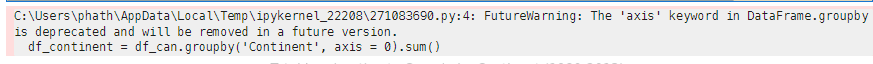

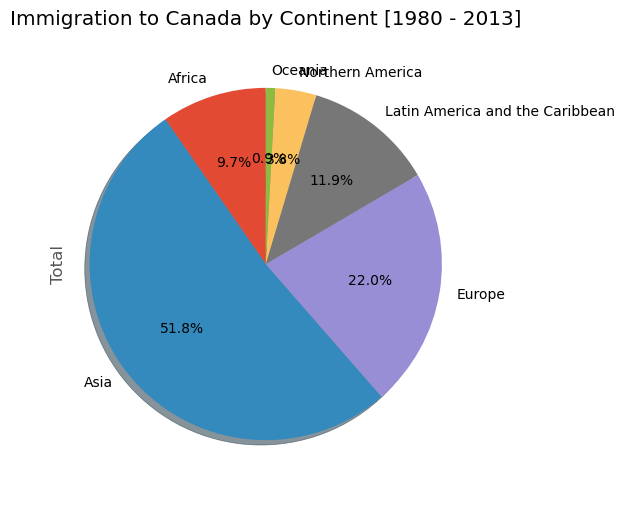

In [28]:

#a) gather data
df_continent = df_can.groupby('Continent').sum() #due to axis be remove when i asign this, and at my kernel, it more likely that axis does not have any value

#b) plot data 1:
df_continent["Total"].plot(kind = "pie",
                           startangle = 90,
                           shadow = True,
                           figsize = (5,6),
                          autopct ="%1.1f%%")
plt.title("Immigration to Canada by Continent [1980 - 2013]")
plt.axis("equal")
plt.show;

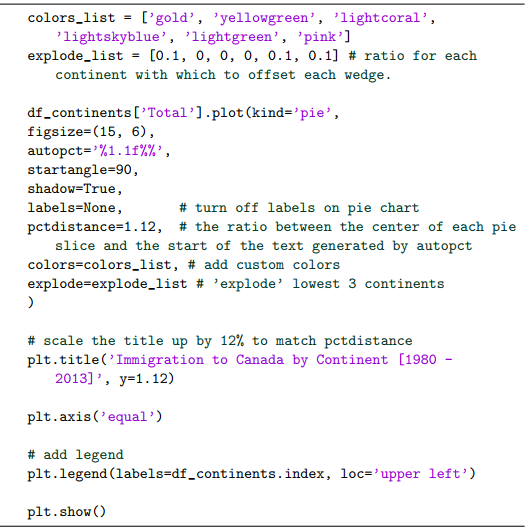

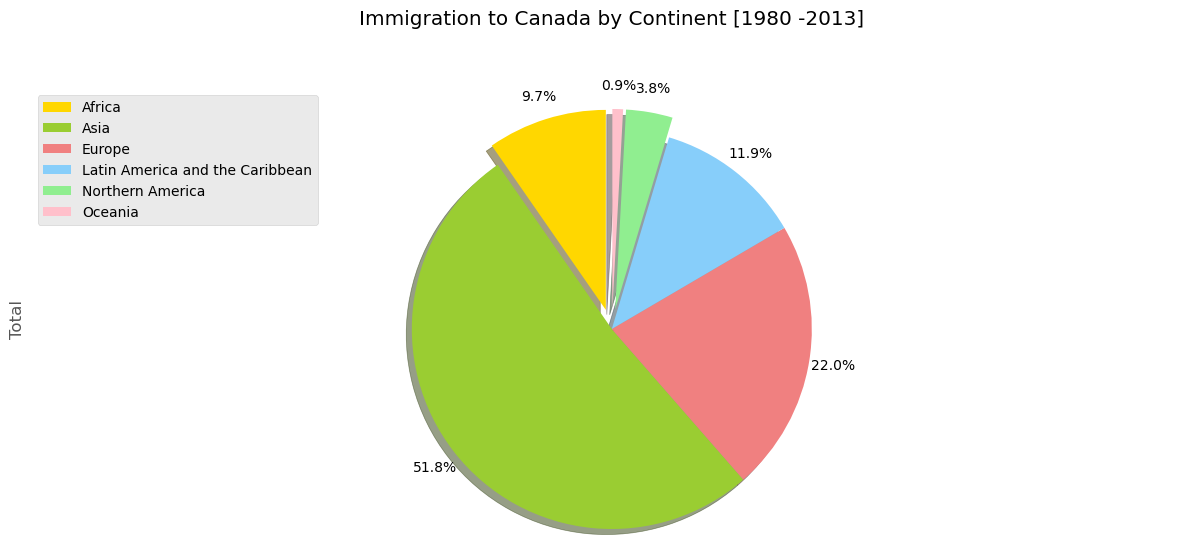

In [30]:
#b) plot data 2
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
df_continent["Total"].plot(kind = "pie",
                           figsize =(15,6),
                           autopct = "%1.1f%%",
                           startangle = 90,
                           shadow = True,
                           labels = None,
                           pctdistance =1.12, # to show outline the line of circle
                           colors = colors_list,
                           explode = explode_list
                          )

plt.title("Immigration to Canada by Continent [1980 -2013]", y=1.12)

plt.axis("equal")

plt.legend(labels = df_continent.index, loc = "upper left")

plt.show();

<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i>2) Box plot</i></h3>


In [32]:
#a) Get dataset:
df_japan = df_can.loc["Japan",years].transpose()
df_japan.head()

1980    701
1981    756
1982    598
1983    309
1984    246
Name: Japan, dtype: object

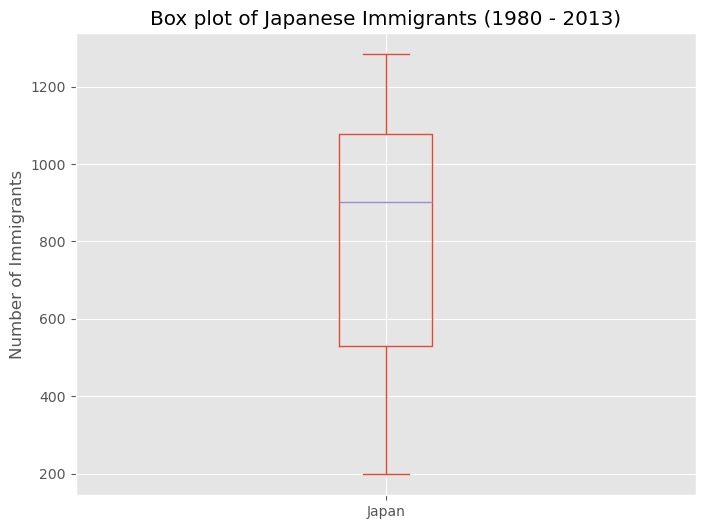

In [34]:
df_japan.plot(kind = 'box', 
              figsize=(8, 6),
             )

plt.title('Box plot of Japanese Immigrants (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

In [36]:
df_japan.describe()

count      34
unique     34
top       701
freq        1
Name: Japan, dtype: int64

<h4 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>
Observationa about this plot:
</i></h4>


In [38]:
mean = df_japan.mean()
median = df_japan.median()
max_value = df_japan.max()
min_value = df_japan.min()
quantile_25 = df_japan.quantile(0.25)
quantile_75 = df_japan.quantile(0.75)

print(f"""
So the statistics show from Japan data are:
Mean: {mean}
Median: {median}
Max: {max_value}
Min: {min_value}
25th Percentile: {quantile_25}
75th Percentile: {quantile_75}
""")



So the statistics show from Japan data are:
Mean: 814.9117647058823
Median: 902.0
Max: 1284
Min: 198
25th Percentile: 529.0
75th Percentile: 1079.0



<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i> 2.1) Compare distribution of the number of new immigrants from India and China from period 1980-2013</i></h3>


In [42]:
df_can.head()

,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [44]:
df_can.reset_index()
df_CI = df_can.loc[['China','India'],years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


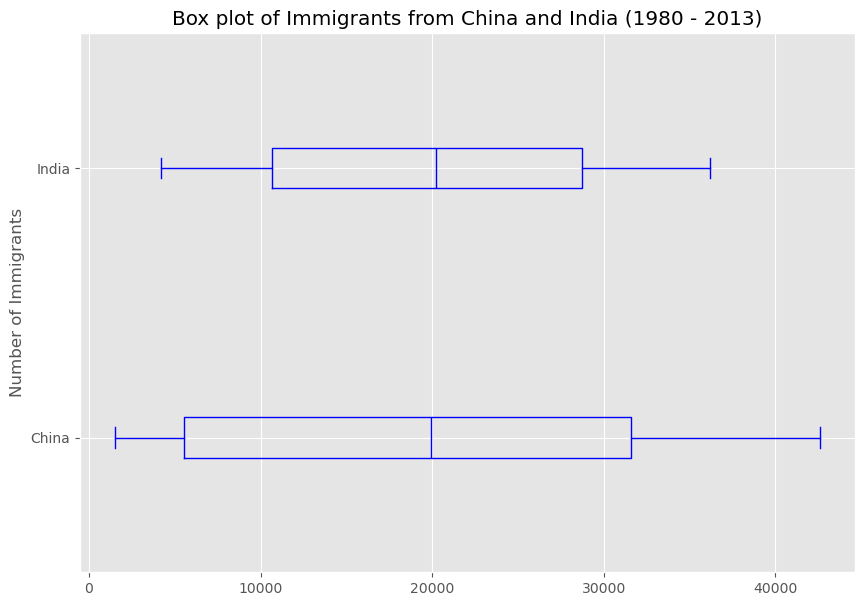

In [46]:
df_CI.plot(kind="box",
           figsize= (10,7),
          color = "blue",
           vert = False
          )

plt.title('Box plot of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i> 3) Subplots</i></h3>


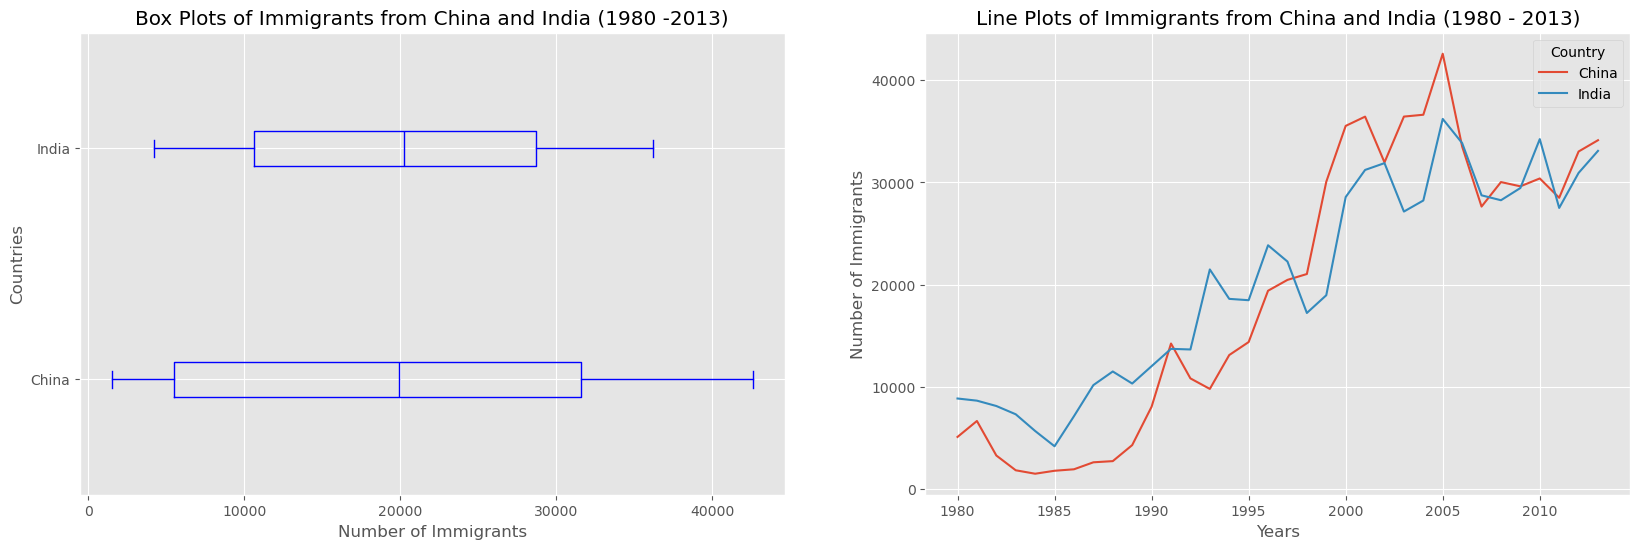

In [48]:
import matplotlib.pyplot as plt

#setting up 2 fig
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

#subplot1
df_CI.plot(kind = "box", color = "blue", vert = False, figsize = (20,6), ax = ax0)
ax0.set(
    title="Box Plots of Immigrants from China and India (1980 -2013)",
    xlabel="Number of Immigrants",
    ylabel="Countries"
)

#subplot2
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1)
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [77]:
new_df[new_df['2000s'] > 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i> 3.1) Question: Create a box plot to visualize the distribution of the top 15 countries
(based on total immigration) grouped by the decades 1980s, 1990s, and 2000s </i></h3>


In [52]:
# Step1: Get dataset
df_top15 = df_can.sort_values('Total',axis = 0, ascending = False).head(15)
df_top15_80 = df_top15[list(map(str, range(1980,1990)))].sum(axis = 1)
df_top15_90 = df_top15[list(map(str, range(1990,2000)))].sum(axis = 1)
df_top15_00 = df_top15[list(map(str, range(2000,2010)))].sum(axis = 1)

In [54]:
# Step2: Create a new dataframe which contains the aggregate for each decade.
new_df = pd.DataFrame({"1980s": df_top15_80, "1990s": df_top15_90, "2000s": df_top15_00})

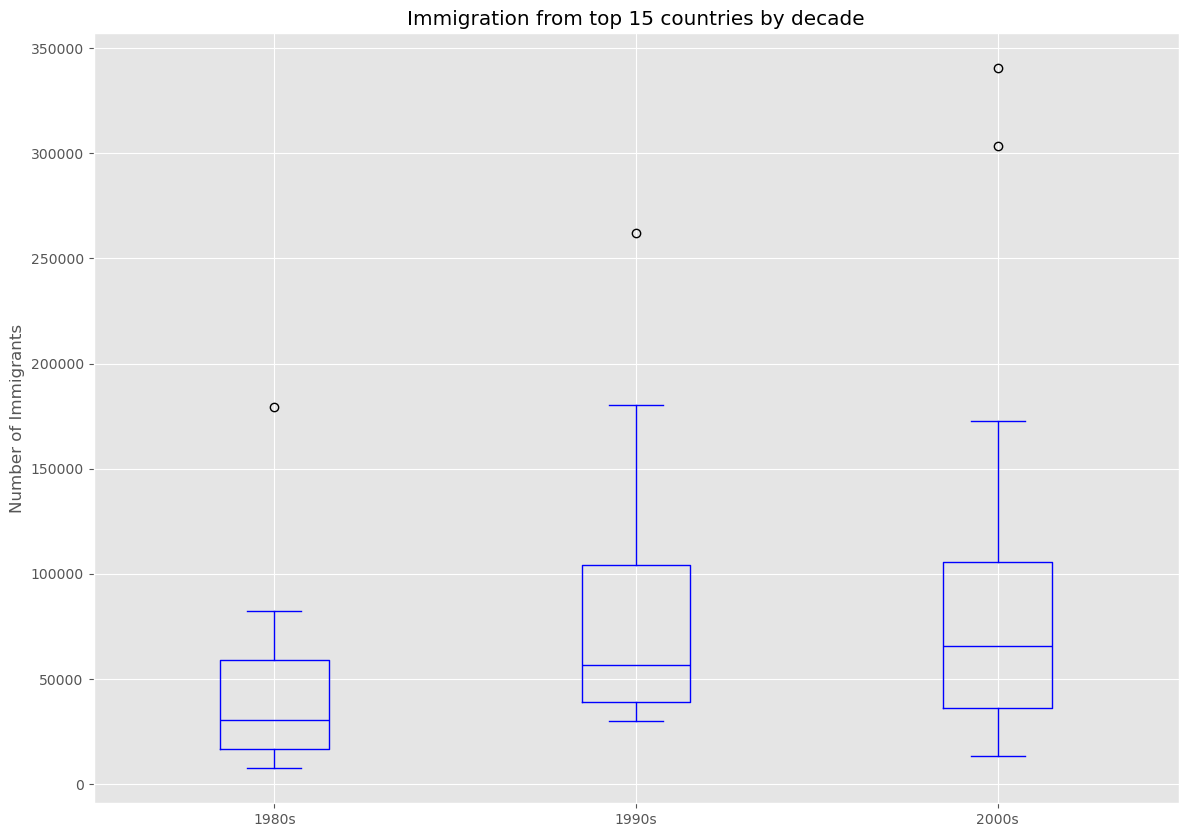

In [56]:
# Step3: Create box plots: 
new_df.plot(kind='box', color='blue', figsize=(14, 10))
plt.title('Immigration from top 15 countries by decade')
plt.ylabel('Number of Immigrants')
plt.show()


<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i> 4) Scatter plot</i></h3>


In [58]:
#Step 1: Get Dataset
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


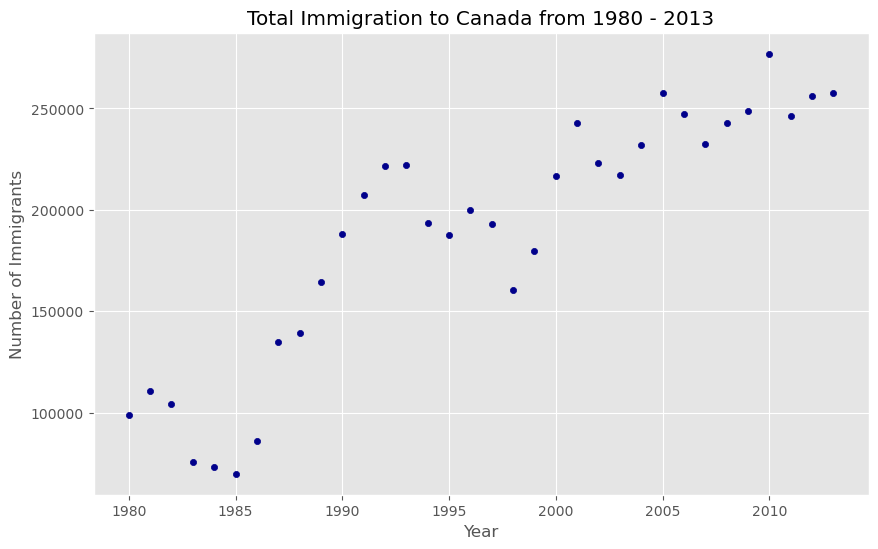

In [79]:
#Step 2: Plot Data
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color = "darkblue")

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i> 4) Regression line</i></h3>


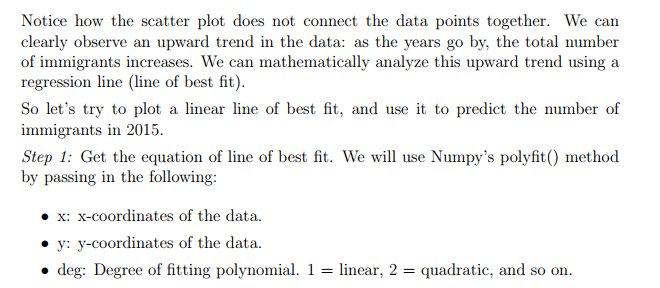

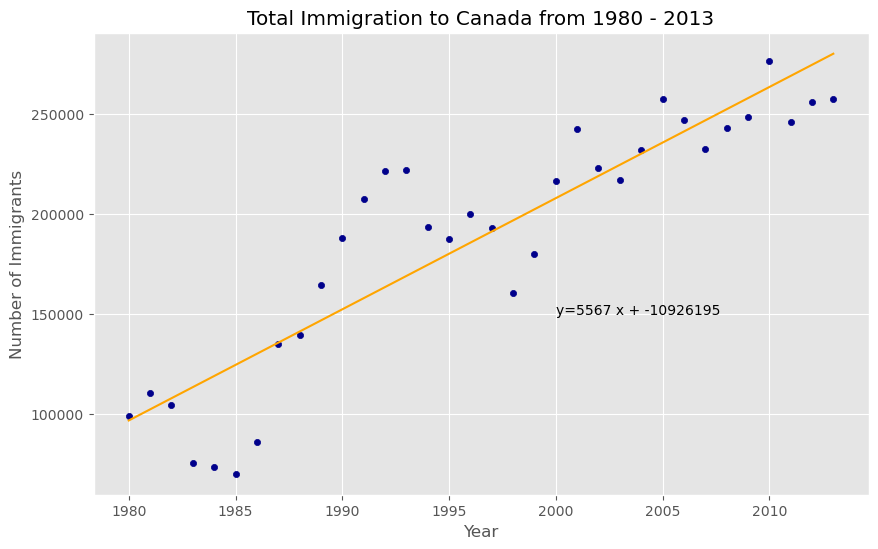

'No. Immigrants = 5567 * Year + -10926195'

In [81]:
x = df_tot['year']      
y = df_tot['total']   
fit = np.polyfit(x, y, deg=1)

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color = "darkblue")

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0] * x + fit[1], color='orange') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()

'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i> Question: Create a scatter plot of the total immigration from Denmark, Norway,
and Sweden to Canada from 1980 to 2013? </i></h3>


In [100]:
#Get the data, Step 1:
df_countries = df_can.loc[["Denmark","Norway","Sweden"], years].transpose()
df_countries.head(3)

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222


In [140]:

df_total = df_countries.sum(axis=1)
df_total = df_total.reset_index()
df_total = df_total.rename(columns={
    "index": "year",
    0: "total" 
})

print(df_total)


    year  total
0   1980    669
1   1981    678
2   1982    627
3   1983    333
4   1984    252
5   1985    285
6   1986    336
7   1987    387
8   1988    373
9   1989    387
10  1990    331
11  1991    381
12  1992    411
13  1993    481
14  1994    345
15  1995    352
16  1996    301
17  1997    338
18  1998    217
19  1999    287
20  2000    287
21  2001    343
22  2002    293
23  2003    327
24  2004    291
25  2005    324
26  2006    293
27  2007    363
28  2008    339
29  2009    323
30  2010    297
31  2011    276
32  2012    287
33  2013    280


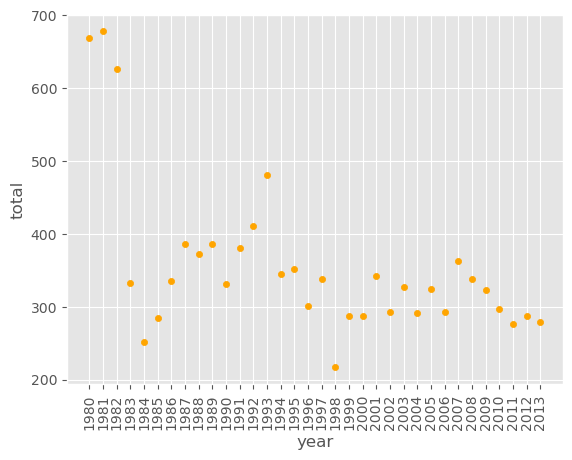

In [160]:
#Plot Scatter plot, Step 2abs
df_total.plot(kind="scatter", x="year", y="total", color = "orange")
plt.xticks(rotation = 90)
plt.title()
plt.show;

<h3 style="text-align: left; font-family: 'JetBrains Mono'; color: red;"><i> 5) Bubble</i></h3>


In [70]:
#Step 1: Get data of Brazil and Argentina
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = "Year"
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [74]:
#normalise Brasil data:

norm_brazil = (df_can_t["Brazil"] - df_can_t["Brazil"].min()) / (df_can_t["Brazil"].max() - df_can_t["Brazil"].min())
norm_argentina = (df_can_t["Argentina"] - df_can_t["Argentina"].min()) / (df_can_t["Argentina"].max() - df_can_t["Argentina"].min())

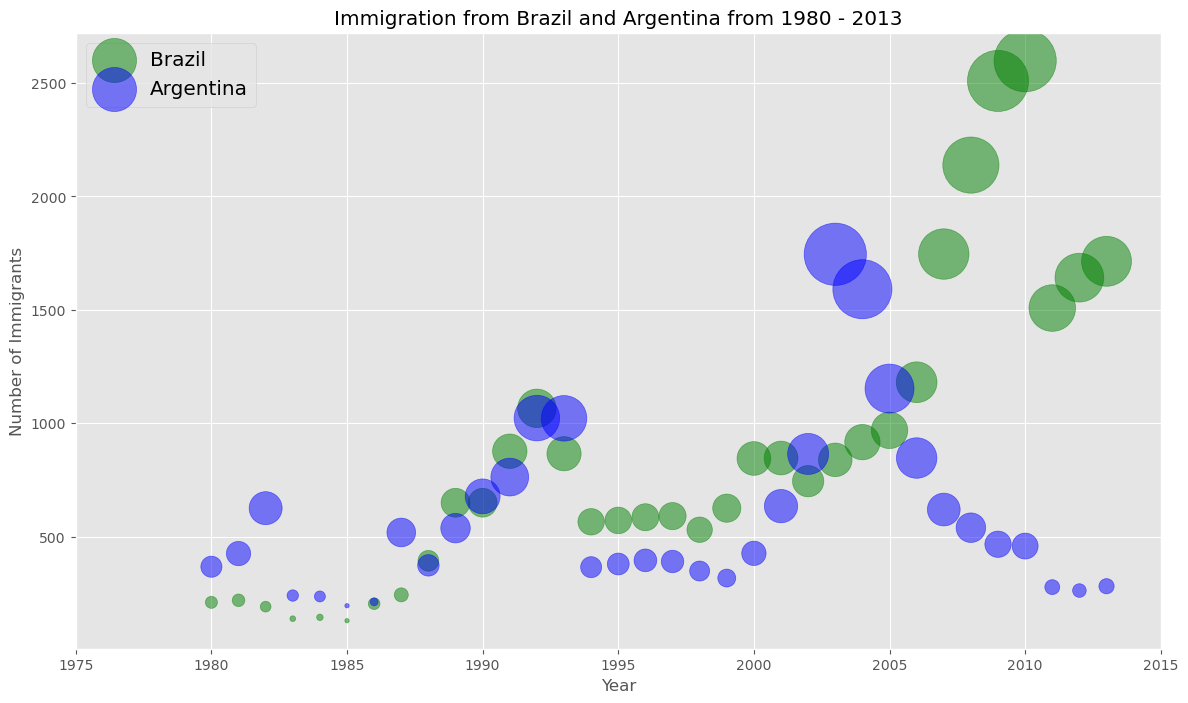

In [396]:
ax0 = df_can_t.plot(kind="scatter",
x="Year",
y="Brazil",
figsize=(14, 8),
alpha=0.5, # transparency
color="green",
s=norm_brazil * 2000 + 10, # pass in weights
xlim=(1975, 2015)
)
#Argentina
ax1 = df_can_t.plot(kind="scatter",
x="Year",
y="Argentina",
alpha=0.5,
color="blue",
s=norm_argentina * 2000 + 10,
ax = ax0
)
ax0.set_ylabel("Number of Immigrants")
ax0.set_title("Immigration from Brazil and Argentina from 1980 - 2013")
ax0.legend(["Brazil", "Argentina"], loc="upper left",
fontsize="x-large")

plt.show;

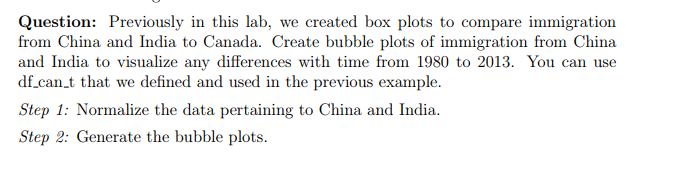

In [375]:
norm_China = (df_CI["China"] - df_CI["China"].min()) / (df_CI["China"].max() - df_CI["China"].min())
norm_India = (df_CI["India"] - df_CI["India"].min()) / (df_CI["India"].max() - df_CI["India"].min())

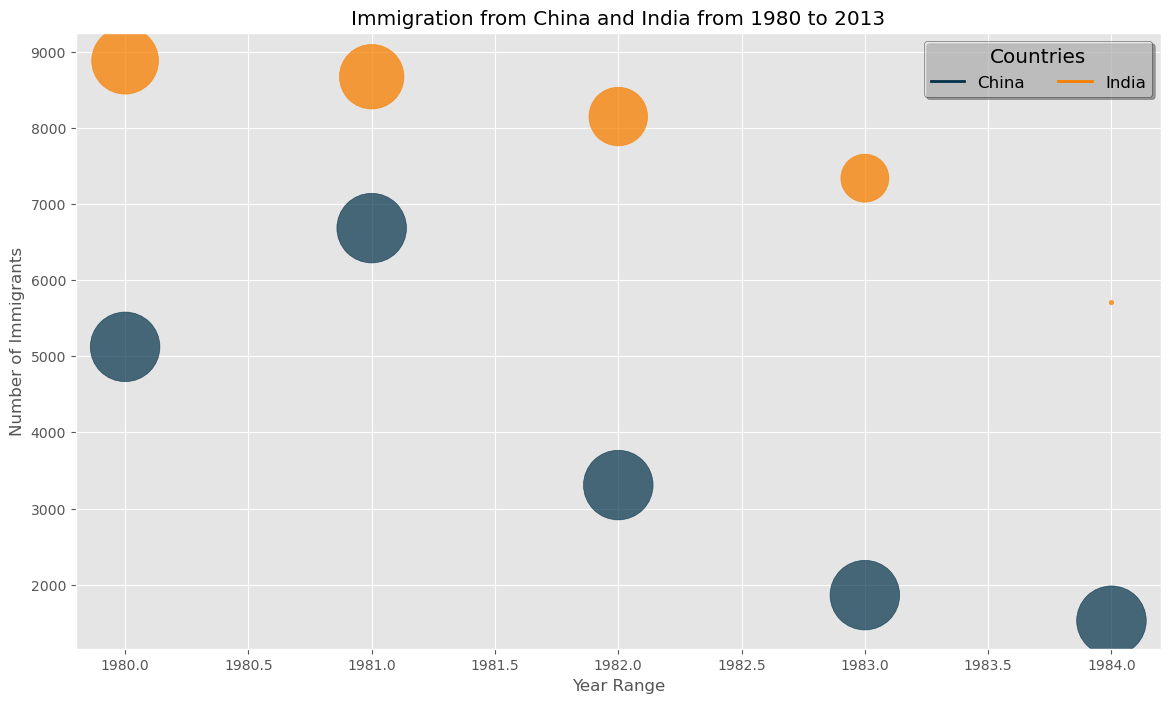

In [439]:
fig, ax0 = plt.subplots(figsize=(14, 8))
# Plot for China
df_CI.plot(
    kind="scatter",
    x="Year",
    y="China",
    alpha=0.7,
    color="#003049",
    s=norm_China + 2500 + 10,
    ax=ax0,
    label="China"
)
# Plot for India
df_CI.plot(
    kind="scatter",
    x="Year",
    y="India",
    alpha=0.75,
    color="#f77f00",
    s=norm_India * 2300 + 10,
    ax=ax0,
    label="India"
)
# Set titles and labels
ax0.set(
    title="Immigration from China and India from 1980 to 2013",
    xlabel="Year Range",
    ylabel="Number of Immigrants"
)

#show the plot and legend
from matplotlib.lines import Line2D
handles = [
    Line2D([0], [0], color="#003049", lw=2, label="China"),
    Line2D([0], [0], color="#f77f00", lw=2, label="India")
]
plt.legend(handles=handles, loc='upper right', fontsize='large', title='Countries', title_fontsize='x-large', shadow=True, frameon=True, fancybox=True, framealpha=0.5, edgecolor='black', ncol=2)

plt.show();